# Week 12 Homework

In [12]:
# Dependencies and modules:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import seaborn as sns
sns.set_theme(style="whitegrid")
import statistics
import math
from scipy import stats
 

# loans.csv file:

loans_path = "C:/Users/Nik/Documents/loans.csv"
loans_df = pd.read_csv(loans_path)
loans_df.head(1)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0


### 1. In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course. 

ML is the final tier of the data hierarchy-of-needs pyramid. As such, there should be a very specific circumstance present before resources are spent deploying ML.  According to the DataCamp module, ML “should not be the first data initiative the company or the team pursues.” The principle of ‘garbage in, garbage out’ should be remembered. The team should spend adequate time and resources ensuring they have first gathered enough data and that the data has been deftly pre-processed and analyzed. Then the features need to be examined and thoughtfully modeled and tested. Only once these things have taken place can machine learning be employed to benefit. 

Considering the requisite resources to employ ML, it should be considered if an actionable outcome can even be produced for the cost. If you identify the source of your churn or fraud but can’t do anything about it for one reason or another, you won’t get a return on your investment in the data analysis.  Further, what will be the gain? The Datacamp module used the example like “Would you spend one million dollars to make an extra $50k annually?” ML has to make sense from that perspective.

However, if you have a sufficient data pool, have spent the time cleaning and pre-processing that data and thinking about your problems, what your target variables should be, or date features you need for analysis, if you have identified an approach that can create actionable results and the modeling is testing well with acceptable gain margins, machine learning can then be employed as a powerful business strategy.


### 2. Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques. 

In [13]:
# Looking at the DF
loans_df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [14]:
# Examining features of the df.
print(loans_df.columns, loans_df.shape)

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankr

In [15]:
# There are 10000 rows and 55 columns to this dataframe
# Examining more features of the df:This identifies what columns have how many null values.
# Additionally, I sorted them most to least so I can see which columns are really craptastic.

loans_df.isnull().sum().sort_values(ascending=False)

verification_income_joint           8545
debt_to_income_joint                8505
annual_income_joint                 8505
months_since_90d_late               7715
months_since_last_delinq            5658
months_since_last_credit_inquiry    1271
emp_title                            833
emp_length                           817
num_accounts_120d_past_due           318
debt_to_income                        24
installment                            0
num_mort_accounts                      0
account_never_delinq_percent           0
tax_liens                              0
public_record_bankrupt                 0
loan_purpose                           0
application_type                       0
loan_amount                            0
term                                   0
interest_rate                          0
grade                                  0
delinq_2y                              0
sub_grade                              0
issue_month                            0
loan_status     

In [ ]:
# Surprisingly, only 10 columns contained null values:
# verification_income_joint           8545
# debt_to_income_joint                8505
# annual_income_joint                 8505
# months_since_90d_late               7715
# months_since_last_delinq            5658
# months_since_last_credit_inquiry    1271
# emp_title                            833
# emp_length                           817
# num_accounts_120d_past_due           318
# debt_to_income                        24

# I feel like debt_to_income ratio is critical data and has relatively low NAN values, 
# so I will fillna instead of dropna on that column, but will probably drop the other columns, 
# or drop rows with NANs on columns I feel are important to my goal.

In the following lines, I want to remove missing data, convert column types where possible, use pd.factorize(), and examine df more closely with np.where() function.

In [17]:
# I think data loses it's value if we don't know it's emp_title, so I will drop those rows:

loans_df.dropna(axis=0, subset=['emp_title'], inplace=True)
#check to ensure that 833 rows were culled (10000-833 = 9,167)
loans_df.shape
#output is as expected!

(9167, 55)

In [ ]:
# Looking at the data, the columns with large amounts of NANs are the joint values for couples that
# don't apply to individuals, so I don't need to drop those columns, I will just fill them with "Not Applicable"

3. Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.

4. Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes.

5. Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function. 

    a. Is there a better way to do this than with a lambda? 

    b. Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown.

6. Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

7. Think of some questions you want to ask our guests next week. You can ask them anything, just make sure its thoughtful. 

Questions: 

# DataCamp Completion

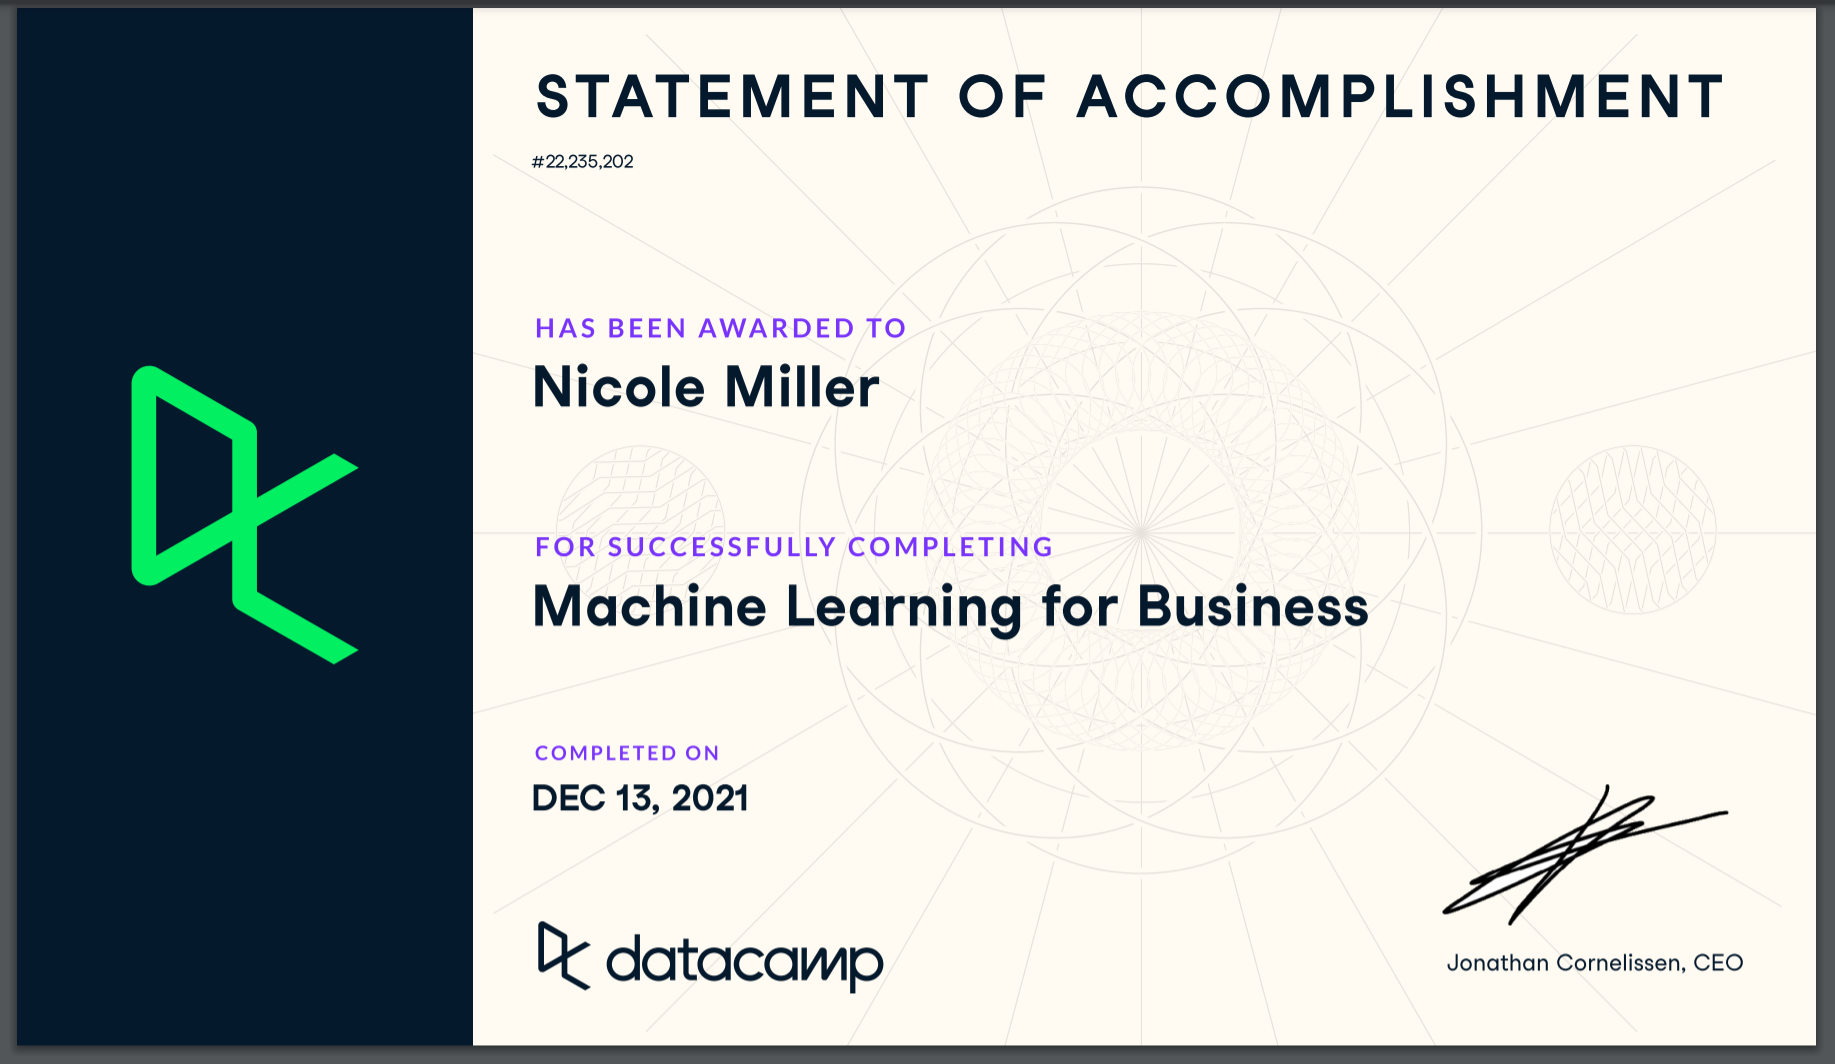

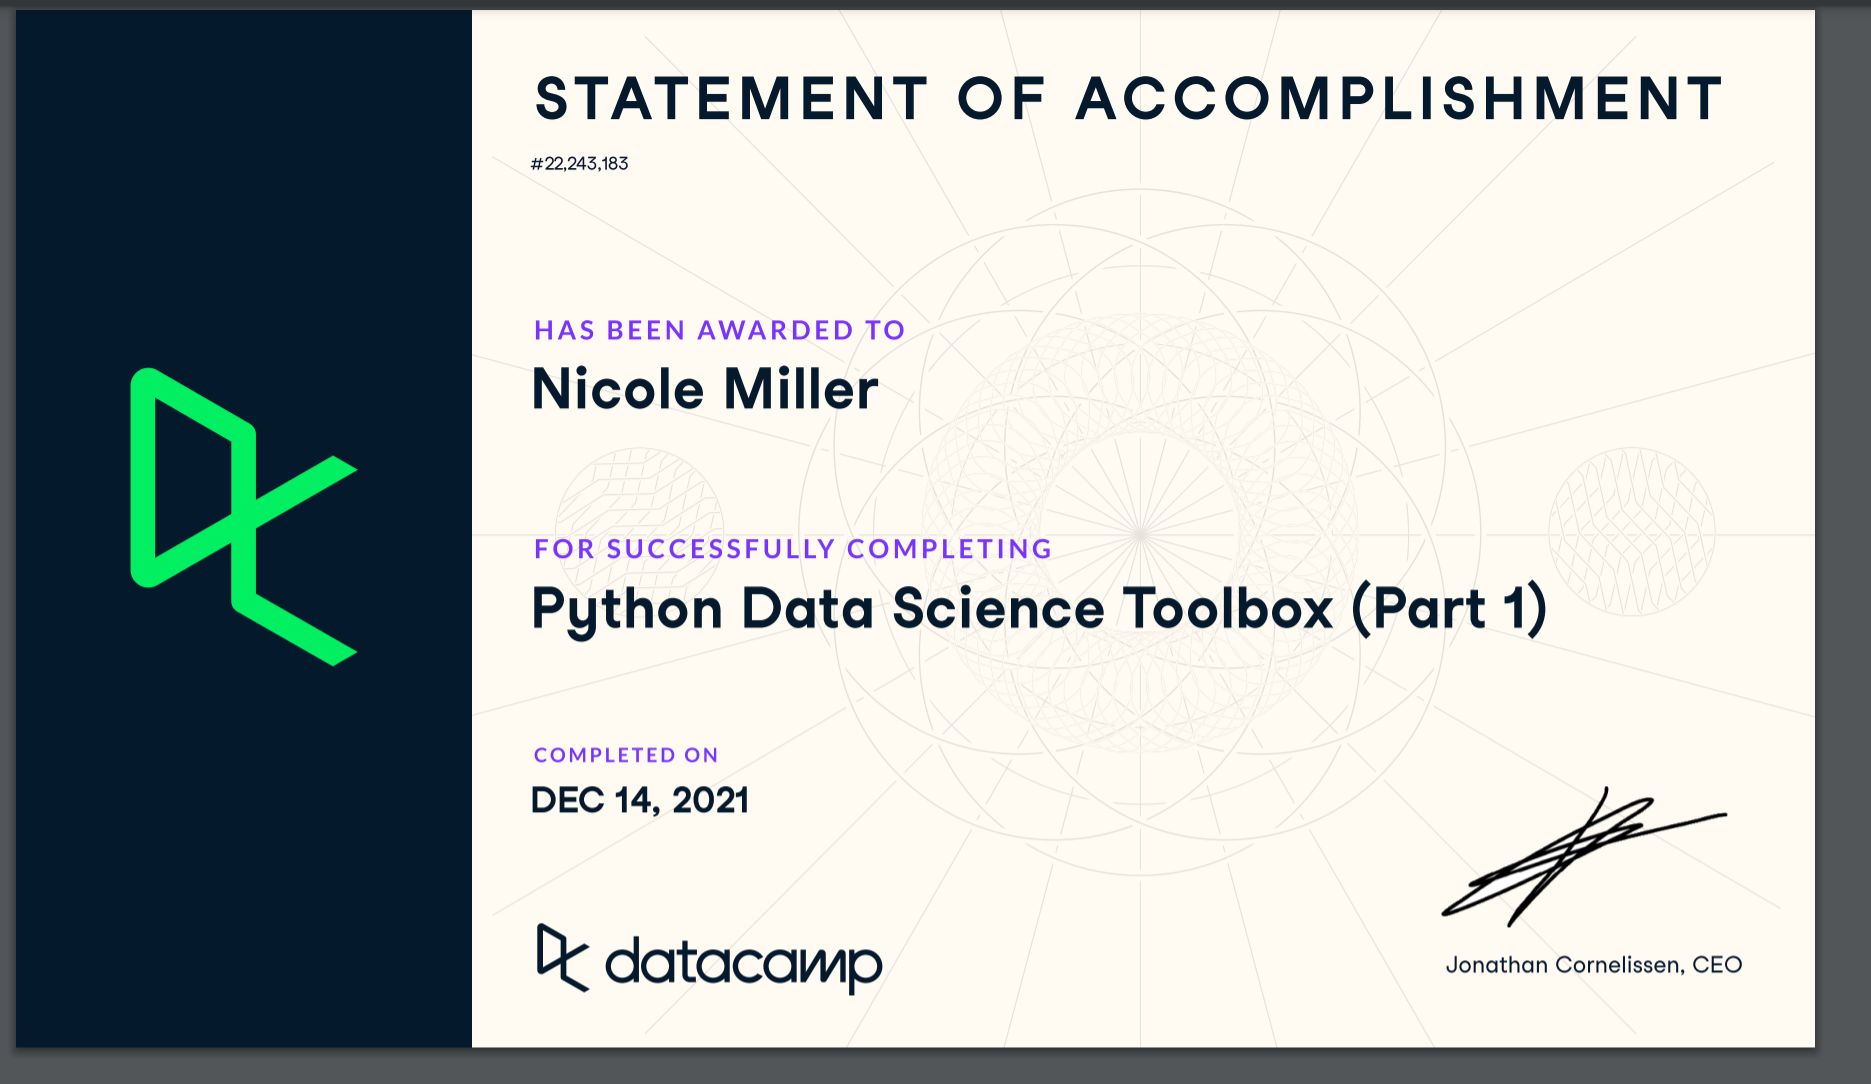